In [1]:
import argparse
import psycopg2
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import scipy.signal as sg
from allensdk.core.nwb_data_set import NwbDataSet
import pandas as pd
%matplotlib inline

In [2]:
cells_df = pd.load('showcase_df.h5')

C:\Anaconda\lib\site-packages\pandas\core\common.py:2905: FutureWarning: load is deprecated, use read_pickle
  warnings.warn("load is deprecated, use read_pickle", FutureWarning)


In [3]:
cells_df.head()

,Labtrax_ID,Noise_sweeps,depol_sweeps,hyper_sweeps,ss_sweep,ls_sweep,ramp_sweep,full_name,nwb_path,specimen_id,Cre+,Transgenic_Line,ephys_result_id,dendrite_type,depol_threshold,hyper_threshold,ss_threshold,ls_threshold,ramp_threshold_sweep
0,165865.05.02,"[37, 38, 39, 40, 41]","[95, 97, 98, 99, 100]","[85, 86, 87, 88, 89, 90, 91, 92]","[11, 12, 13, 14, 15, 16, 17, 18]","[44, 45, 46]","[4, 5, 6]",Sst-IRES-Cre;Ai14-165865.05.02.01,y:/mousecelltypes\prod251\Ephys_Specimen_Roi_p...,464212183,t,Sst-IRES-Cre,464212181,aspiny,97,88,12,45,4
1,165865.03.01,"[37, 38, 39, 40, 41, 42]",None,None,"[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]","[35, 36, 44, 45]","[4, 5, 6]",Sst-IRES-Cre;Ai14-165865.03.01.01,y:/mousecelltypes\prod251\Ephys_Specimen_Roi_p...,464198958,t,Sst-IRES-Cre,464198956,aspiny,None,None,14,35,4
2,165171.03.01,[71],None,None,"[17, 18, 19, 20, 21, 22, 23, 24, 25]",[82],"[4, 5]",Pvalb-IRES-Cre;Ai14-165171.03.01.01,y:/mousecelltypes\prod115\Ephys_Specimen_Roi_p...,313862373,t,Pvalb-IRES-Cre,313862370,aspiny,None,None,17,82,4
3,165171.03.02,"[49, 50, 51, 52, 53]","[111, 112, 113, 114, 115, 116, 117, 118, 119]","[103, 104, 105, 106]","[14, 15, 16, 17, 18, 19, 67, 100, 101, 102]","[46, 47]","[4, 5, 6]",Pvalb-IRES-Cre;Ai14-165171.03.02.01,y:/mousecelltypes\prod251\Ephys_Specimen_Roi_p...,464326041,f,Pvalb-IRES-Cre,464326039,aspiny,114,103,14,47,4
4,165172.06.02,"[37, 38, 39, 40, 41, 42]",None,None,[10],[35],"[0, 1]",Pvalb-IRES-Cre;Ai14-165172.06.02.01,y:/mousecelltypes\prod251\Ephys_Specimen_Roi_p...,464326095,t,Pvalb-IRES-Cre,464326093,aspiny,None,None,10,None,0


In [4]:
cells_df['ls2_sweep'] = None

In [5]:
for i in range(len(cells_df)):
    ds =NwbDataSet(cells_df['nwb_path'][i])
    if cells_df['ls_threshold'][i] != None:
        sweep = ds.get_sweep(cells_df['ls_threshold'][i])
        spike_times = ds.get_spike_times(cells_df['ls_threshold'][i])
        if len(spike_times) > 1:
            cells_df['ls2_sweep'][i] = cells_df['ls_threshold'][i]

In [6]:
cells_df.save('showcase_df.h5')

C:\Anaconda\lib\site-packages\pandas\core\generic.py:968: FutureWarning: save is deprecated, use to_pickle
  warnings.warn("save is deprecated, use to_pickle", FutureWarning)


In [13]:
total = 0
for i in range(len(cells_df)):
    if cells_df['ss_threshold'][i] != None and cells_df['ls_threshold'][i] != None and cells_df['ramp_threshold_sweep'][i] != None:
        total += 1
print total

893


In [5]:
s=0
sweep_type = ['ss_threshold','ls_threshold','ramp_threshold_sweep']
ss_threshold_raw = np.empty((893,1000))
ls_threshold_raw = np.empty((893,1000))
ramp_threshold_raw = np.empty((893,1000))
array_type = [ss_threshold_raw,ls_threshold_raw,ramp_threshold_raw]
for i in range(len(cells_df)):
    if cells_df['ss_threshold'][i] != None and cells_df['ls_threshold'][i] != None and cells_df['ramp_threshold_sweep'][i] != None:
        for j in range(len(sweep_type)):
            ds=NwbDataSet(cells_df['nwb_path'][i])
            sweep = ds.get_sweep(cells_df[sweep_type[j]][i])
            sweep_i = np.copy(sweep['response']) *1e3
            sampling_rate = sweep['sampling_rate']
            time_window = 0.005
            spike_times = ds.get_spike_times(cells_df[sweep_type[j]][i])
            #sweep_i[:] = [x +(-sweep_i[int(spike_times[0]*sampling_rate)]) for x in sweep_i]
            sweep_i=sweep_i[int(spike_times[0]*sampling_rate):int(spike_times[0]*sampling_rate)+1000]
            array_type[j][s,:] = sweep_i
        s += 1
        print s

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [6]:
np.save('ss_threshold_raw.npy',ss_threshold_raw)
np.save('ls_threshold_raw.npy',ls_threshold_raw)
np.save('ramp_threshold_raw.npy',ramp_threshold_raw)

In [29]:
total = 0
for i in range(len(cells_df)):
    if cells_df['depol_threshold'][i] != None and cells_df['hyper_threshold'][i] != None:
        total += 1
s=0
sweep_type = ['depol_threshold','hyper_threshold']
depol_threshold = np.empty((total,1000))
hyper_threshold = np.empty((total,1000))
array_type = [depol_threshold,hyper_threshold]
for i in range(len(cells_df)):
    if cells_df['depol_threshold'][i] != None and cells_df['hyper_threshold'][i] != None:
        for j in range(len(sweep_type)):
            ds=NwbDataSet(cells_df['nwb_path'][i])
            sweep = ds.get_sweep(cells_df[sweep_type[j]][i])
            sweep_i = np.copy(sweep['response']) *1e3
            sampling_rate = sweep['sampling_rate']
            time_window = 0.005
            spike_times = ds.get_spike_times(cells_df[sweep_type[j]][i])
            #sweep_i[:] = [x +(-sweep_i[int(spike_times[0]*sampling_rate)]) for x in sweep_i]
            sweep_i=sweep_i[int(spike_times[0]*sampling_rate):int(spike_times[0]*sampling_rate)+1000]
            array_type[j][s,:] = sweep_i
        s += 1
        print s

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113


In [30]:
np.save('depol_threshold.npy',depol_threshold)
np.save('hyper_threshold.npy',hyper_threshold)

In [7]:
full_set = []
ls2_set = []
for i in range(len(cells_df)):
    if cells_df['ss_threshold'][i] != None and cells_df['ramp_threshold_sweep'][i] !=None and cells_df['ls_threshold'][i] != None:
        full_set.append(cells_df['Labtrax_ID'][i])
    if cells_df['ls2_sweep'][i] != None:
        ls2_set.append(cells_df['Labtrax_ID'][i])
    

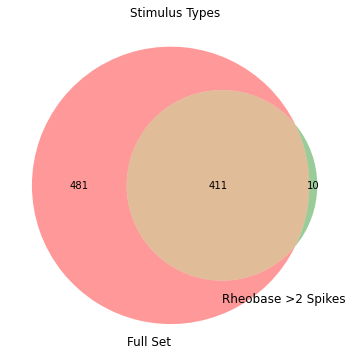

In [9]:
from matplotlib_venn import venn2
full_set = set(full_set)
ls2_set = set(ls2_set)
plt.figure(figsize=(6,6))
plt.title("Stimulus Types")
venn2([full_set,ls2_set], ('Full Set', 'Rheobase >2 Spikes'))
plt.show()

In [32]:
ss = 0
sl = 0
sr = 0
sweep_type = ['ss_threshold','ls_threshold','ramp_threshold_sweep']
ss_threshold_full = np.empty((1048,1000))
ls_threshold_full = np.empty((943,1000))
ramp_threshold_full = np.empty((994,1000))
array_type = [ss_threshold,ls_threshold,ramp_threshold]
for i in range(len(cells_df)):
    ds=NwbDataSet(cells_df['nwb_path'][i])
    if cells_df['ss_threshold'][i] != None:
        sweep = ds.get_sweep(cells_df['ss_threshold'][i])
        sweep = ds.get_sweep(cells_df['ss_threshold'][i])
        sweep_i = np.copy(sweep['response']) *1e3
        sampling_rate = sweep['sampling_rate']
        time_window = 0.005
        spike_times = ds.get_spike_times(cells_df['ss_threshold'][i])
        sweep_i[:] = [x +(-sweep_i[int(spike_times[0]*sampling_rate)]) for x in sweep_i]
        sweep_i=sweep_i[int(spike_times[0]*sampling_rate):int(spike_times[0]*sampling_rate)+1000]
        ss_threshold_full[ss,:] = sweep_i
        ss +=1
    if cells_df['ls_threshold'][i] != None:
        sweep = ds.get_sweep(cells_df['ls_threshold'][i])
        sweep = ds.get_sweep(cells_df['ls_threshold'][i])
        sweep_i = np.copy(sweep['response']) *1e3
        sampling_rate = sweep['sampling_rate']
        time_window = 0.005
        spike_times = ds.get_spike_times(cells_df['ls_threshold'][i])
        sweep_i[:] = [x +(-sweep_i[int(spike_times[0]*sampling_rate)]) for x in sweep_i]
        sweep_i=sweep_i[int(spike_times[0]*sampling_rate):int(spike_times[0]*sampling_rate)+1000]
        ls_threshold_full[sl,:] = sweep_i
        sl +=1
    if cells_df['ramp_threshold_sweep'][i] != None:
        sweep = ds.get_sweep(cells_df['ramp_threshold_sweep'][i])
        sweep = ds.get_sweep(cells_df['ramp_threshold_sweep'][i])
        sweep_i = np.copy(sweep['response']) *1e3
        sampling_rate = sweep['sampling_rate']
        time_window = 0.005
        spike_times = ds.get_spike_times(cells_df['ramp_threshold_sweep'][i])
        sweep_i[:] = [x +(-sweep_i[int(spike_times[0]*sampling_rate)]) for x in sweep_i]
        sweep_i=sweep_i[int(spike_times[0]*sampling_rate):int(spike_times[0]*sampling_rate)+1000]
        ramp_threshold_full[sr,:] = sweep_i
        sr +=1
    print i

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [7]:
len(cells_df)

1069

In [33]:
np.save('ss_threshold_full.npy',ss_threshold_full)
np.save('ls_threshold_full.npy',ls_threshold_full)
np.save('ramp_threshold_full.npy',ramp_threshold_full)

In [ ]:
s=0
ls2_array = np.empty((421,1000))
for j in range (0,10):
    features = ctc.get_ephys_sweeps(df1.id[j])
    for f in range(len(features)):
        if features[f]['stimulus_name'] == 'Noise 1' or features[f]['stimulus_name'] == 'Noise 2':
            data_set = ctc.get_ephys_data(df1.id[j])
            g = h5py.File(data_set.file_name,'r')
            spike_times = g['analysis']['aibs_spike_times']['Sweep_%d' % features[f]['sweep_number']].value
            g.close()
            time_window = 0.005
            sweep_data = data_set.get_sweep(features[f]['sweep_number'])
            for i in spike_times:
                if i >= 10.02:
                    if i >13.02:
                        break
                    v = np.copy(sweep_data["response"]) # in V
                    v *= 1e3 # to mV
                    v[:] = [x +(-v[int(i*sampling_rate)]) for x in v]
                    v=v[int(i*sampling_rate):int(i*sampling_rate)+1000]
                    noise_array[s,:] =v
                    s += 1